# Linear regression

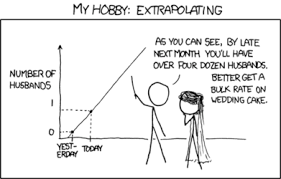


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)

In [ ]:
!pip install statsmodels
!pip install sklearn

In [3]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Table of Contents

## Simple linear regression

Simple linear regression is a statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

Lets see how I generated the data in the previous class:

In [4]:
# slope
beta_1 = 0.08
# intercept
beta_0 = 12
# n students
num_points = 100

# study hours
X = np.random.normal(600, 150, num_points)  

In [16]:
# random error
random_error = np.random.normal(loc=0, scale=5, size=num_points)

# mark
y = beta_0 + (beta_1 * X) + random_error

data = pd.DataFrame({
    'hours': X,
    'grade': y

}).round().astype(int)

<AxesSubplot:xlabel='hours', ylabel='grade'>

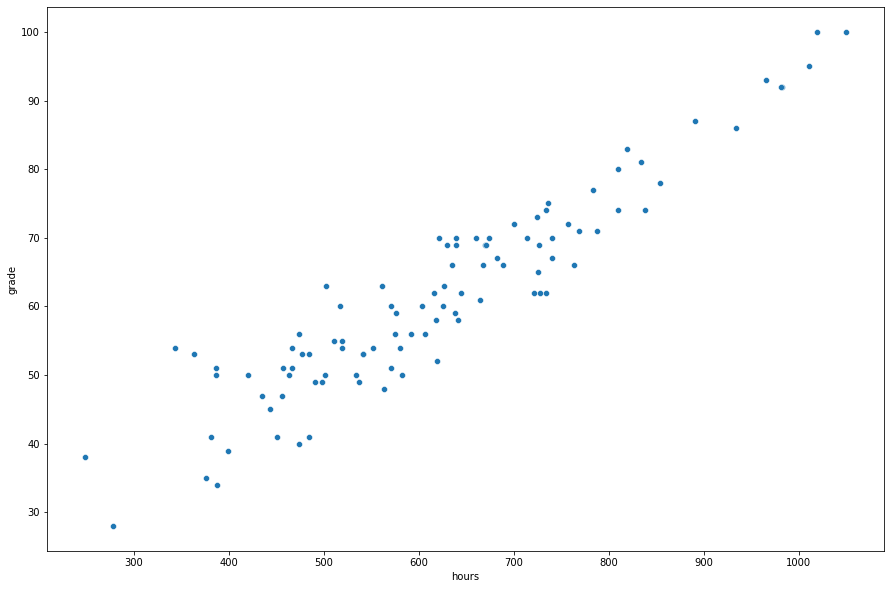

In [18]:
sns.scatterplot(x=data.hours, y=data.grade)

In [20]:
data.head()

,hours,grade
0,838,74
1,728,62
2,722,62
3,626,60
4,810,74


Of course, in real life we don't know the true parameters of the model.

In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [22]:
lr = LinearRegression()

In [38]:
lr.fit(
    X=data.hours.to_frame(),
    y=data.grade
)

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [39]:
beta_0, beta_1

(11.659321955796067, 0.08035262936276326)

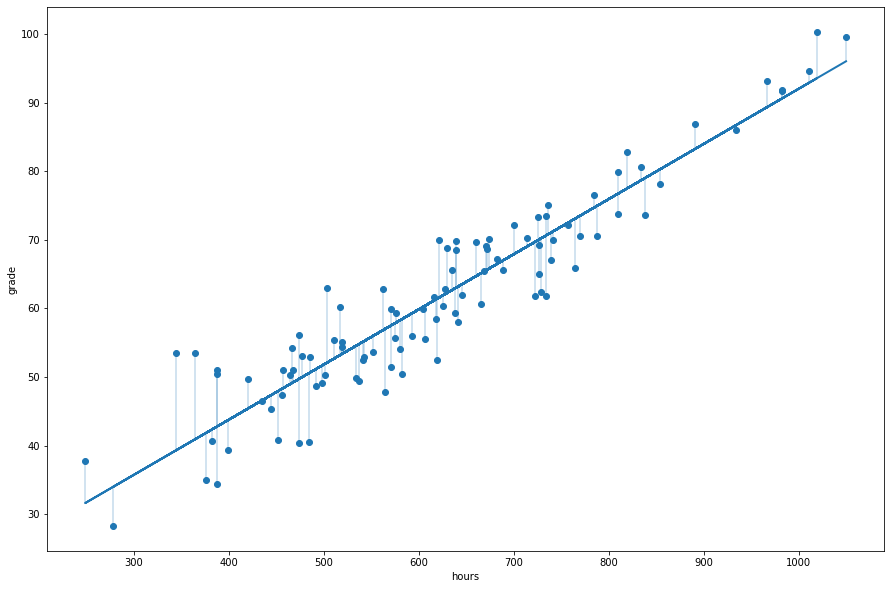

In [42]:
# regression line1
y_hat = beta_0 + beta_1 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('hours')
plt.ylabel('grade')
plt.show()

The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$



### How good is our model?

Lets compare our model with the **baseline** model

**Reminder**:   

$\hat{y}$ means $y$ prediction  
$\bar{y}$ means mean of $y$

The baseline model is the one that predicts the **mean** $y$ value for every entry.  
Its error is (total sum of squares)

$$TSS=\Sigma(y_i - \hat{y}_i)^2=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

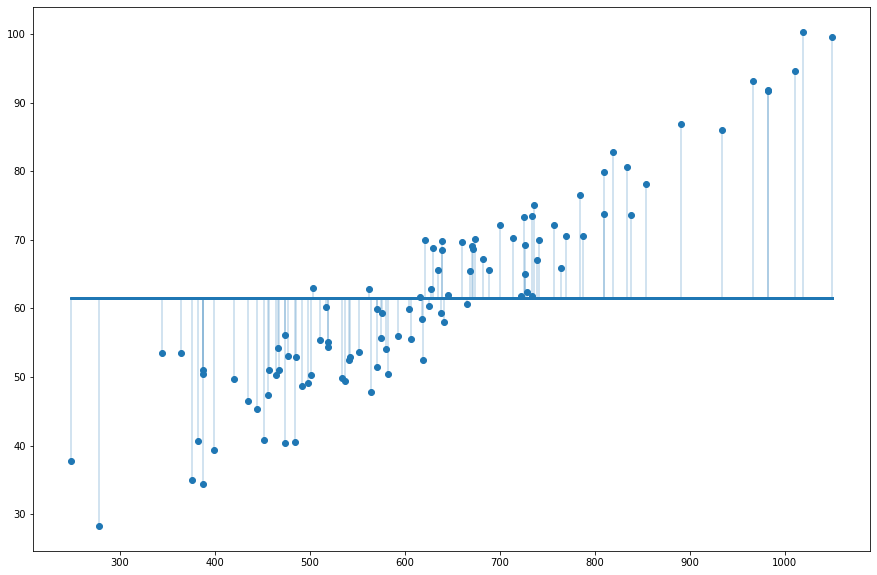

In [44]:
# show mean prediction
mean_prediction = [data.grade.mean()] * num_points
plt.scatter(X, y)
plt.plot(X, mean_prediction, lw=3)
plt.vlines(X, mean_prediction, y, lw=0.4)
plt.show()

In [46]:
# Calculate RSS for the above model
TSS = ((data.grade - mean_prediction) ** 2).sum()
TSS

20872.36

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the squeared of the *Pearson's* correlation coefficient we already know. 

In [47]:
# Calculate the R^2 of the above model
lr.fit(X=data.hours.to_frame(), y=data.grade)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

# preds
y_hat = beta_0 + beta_1 * data.hours

RSS = ((data.grade - y_hat) ** 2).sum()

In [49]:
TSS

20872.36

In [48]:
RSS

2616.7777572917375

In [50]:
# R^2
(TSS - RSS) / (TSS)

0.874629521659662

In [56]:
lr.score(data.hours.to_frame(), y)

0.8746991071495415

$R^2$ measures how good our regression model is. The bigger the better. Up to 1.  
**NOTE**: it is computable for every model, no matter if linear or not. You only need real and predicted values.  

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

In [59]:
data.head()

,hours,grade
0,838,74
1,728,62
2,722,62
3,626,60
4,810,74


In [60]:
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     683.7
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.56e-46
Time:                        11:43:05   Log-Likelihood:                -305.12
No. Observations:                 100   AIC:                             614.2
Df Residuals:                      98   BIC:                             619.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6593      1.978      5.895      0.000       7.734      15.584
hours          0.0804      0.003     26.147      0.000       0.074       0.086
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.653
Skew:                           0.148   Prob(JB):                        0.722
Kurtosis:                       2.738   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. The sleeping hours or your parents' studies. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [65]:
beta_2 = -0.02 # party hours coef
beta_1 = 0.08 # hours studying coef
beta_0 = 11.75
num_points = 100

X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [66]:
data = pd.DataFrame({
    'grades':y, 
    'study_hours': X_1,
    'party_hours': X_2
}).astype(int)

In [67]:
data

,grades,study_hours,party_hours
0,24,443,605
1,38,384,484
2,63,649,21
3,43,387,100
4,83,950,404
...,...,...,...
95,41,484,623
96,42,612,921
97,59,632,599
98,42,629,624


The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


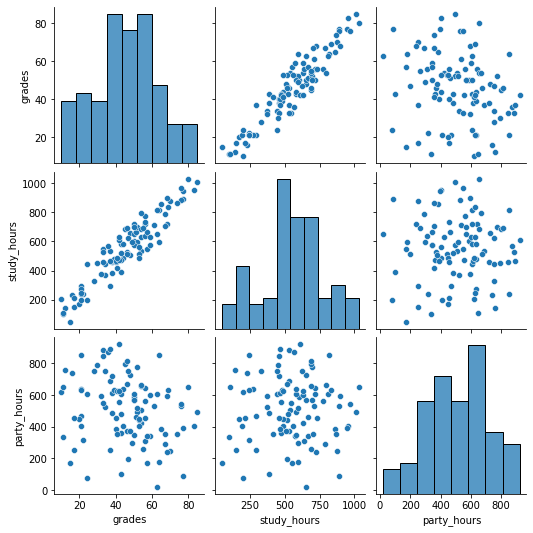

In [69]:
sns.pairplot(data);

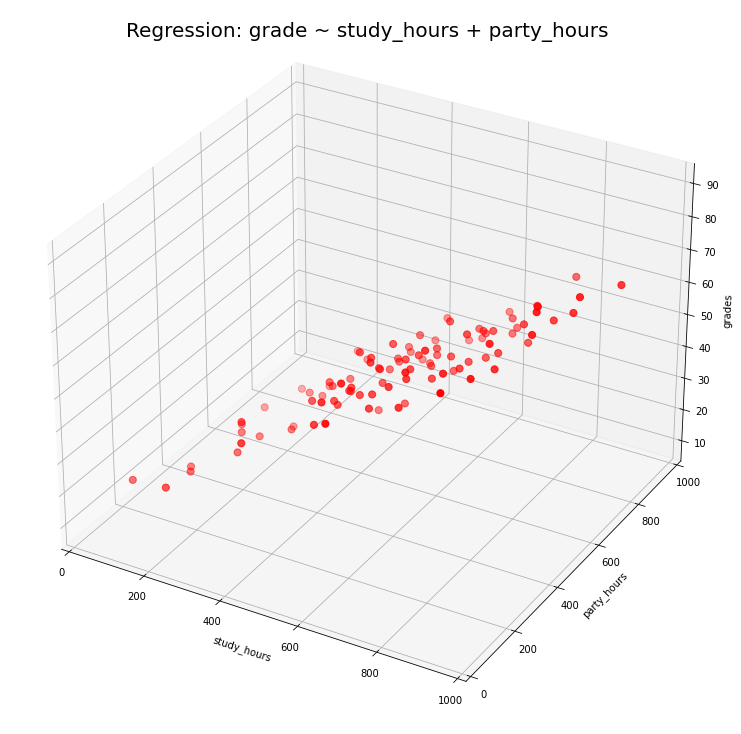

In [70]:
# Create plot
hours = np.arange(0,1000)
iq = np.arange(80,120)

B1, B2 = np.meshgrid(hours, iq, indexing='xy')
Z = np.zeros((iq.size, hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.01, )
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0,1000)
ax.set_ylabel('party_hours')
ax.set_ylim(ymin=0, ymax=1000)
ax.set_zlabel('grades');

In [72]:
data.head()

,grades,study_hours,party_hours
0,24,443,605
1,38,384,484
2,63,649,21
3,43,387,100
4,83,950,404


In [71]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           3.10e-59
Time:                        12:04:51   Log-Likelihood:                -290.11
No. Observations:                 100   AIC:                             586.2
Df Residuals:                      97   BIC:                             594.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.7362      1.647      8.950      0.000      11.468      18.004
study_hours     0.0755      0.002     37.221      0.000       0.071       0.079
party_hours    -0.0206      0.002     -9.297      0.000      -0.025      -0.016
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.078
Skew:                          -0.065   Prob(JB):                        0.962
Kurtosis:                       2.956   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hands on exercise!

Amounts spent on each of 3 media platforms  
Sales performed

In [73]:
df_adv = pd.read_csv('../datasets/Advertising.csv')

First three columns are inversions in different media platforms  
`Sales` expresses number of Sales

In [75]:
df_adv.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


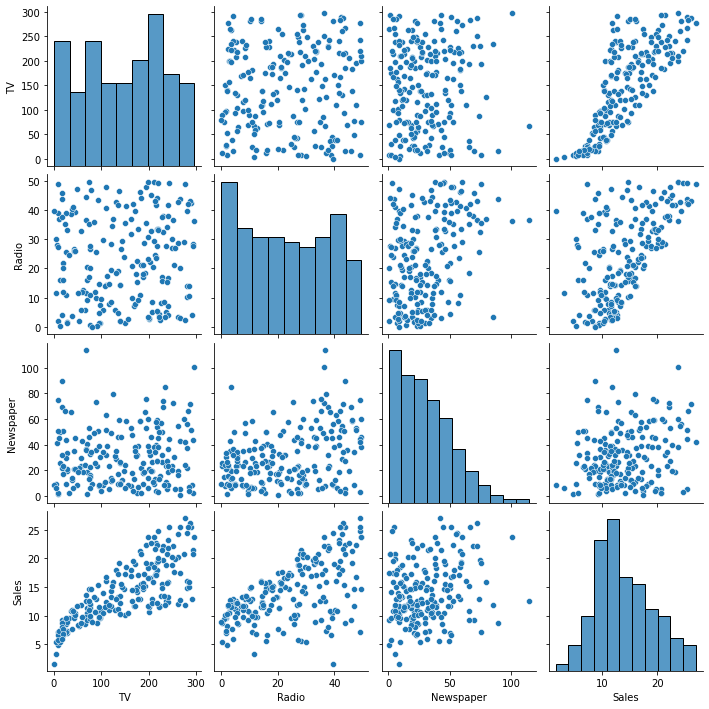

In [76]:
sns.pairplot(df_adv); 

In [77]:
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


* Create three independent simple linear regression models
    * Interpret the results
* Create a multivariate model with all three predictors
    * Interpret the results
**Note** pay special attention to the significance of the `Newspaper variable`.

In [ ]:
# template 
smf.ols('to_predict ~ predictor1 + predictor2 + ...', data=data).fit()
results.summary()

In [79]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [78]:
# Sales ~ TV
results = smf.ols('Sales ~ TV', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        12:13:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Sales ~ Radio
results = smf.ols('Sales ~ Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.35e-19
Time:                        12:15:51   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Sales ~ Newspaper
results = smf.ols('Sales ~ Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 16 Feb 2021   Prob (F-statistic):            0.00115
Time:                        12:16:27   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Sales ~ TV + Radio + Newspaper
results = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        12:18:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$P>|t|$ being big (>0.05), Newspaper variable is not very representative

## Categorical variables

Very often we face situations in which the predictors are *qualitative* in nature. A good example could be the sex of  a person, which can take the vales $M$ or $F$. 

In [86]:
data['sex'] = np.random.choice(['M', 'F'], num_points) 
data

,grades,study_hours,party_hours,sex
0,24,443,605,M
1,38,384,484,F
2,63,649,21,F
3,43,387,100,F
4,83,950,404,M
...,...,...,...,...
95,41,484,623,F
96,42,612,921,M
97,59,632,599,F
98,42,629,624,M


In [87]:
data['is_female'] = data.sex.str.get_dummies()['F']
data

,grades,study_hours,party_hours,sex,is_female
0,24,443,605,M,0
1,38,384,484,F,1
2,63,649,21,F,1
3,43,387,100,F,1
4,83,950,404,M,0
...,...,...,...,...,...
95,41,484,623,F,1
96,42,612,921,M,0
97,59,632,599,F,1
98,42,629,624,M,0


We include this information in the model via a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if person is female} \\
      0  \quad \text{if person is male} \\
\end{array} 
\right. 
$$

If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if i-th person is female} \\
      \beta_0 + \epsilon_i  \quad \text{if i-th person is male} \\
\end{array} 
\right.  $$

In this setting $\beta_0$ represents the average grade among males, and $\beta_0 + \beta_1$ the average grade for females.

In [90]:
results = smf.ols('grades ~  study_hours + is_female', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     365.1
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           7.14e-46
Time:                        12:25:24   Log-Likelihood:                -321.83
No. Observations:                 100   AIC:                             649.7
Df Residuals:                      97   BIC:                             657.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6599      1.781      2.616      0.010       1.124       8.195
study_hours     0.0752      0.003     26.985      0.000       0.070       0.081
is_female      -0.6358      1.229     -0.517      0.606      -3.074       1.803
==============================================================================
Omnibus:                        0.571   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.683
Skew:                           0.030   Prob(JB):                        0.711
Kurtosis:                       2.600   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

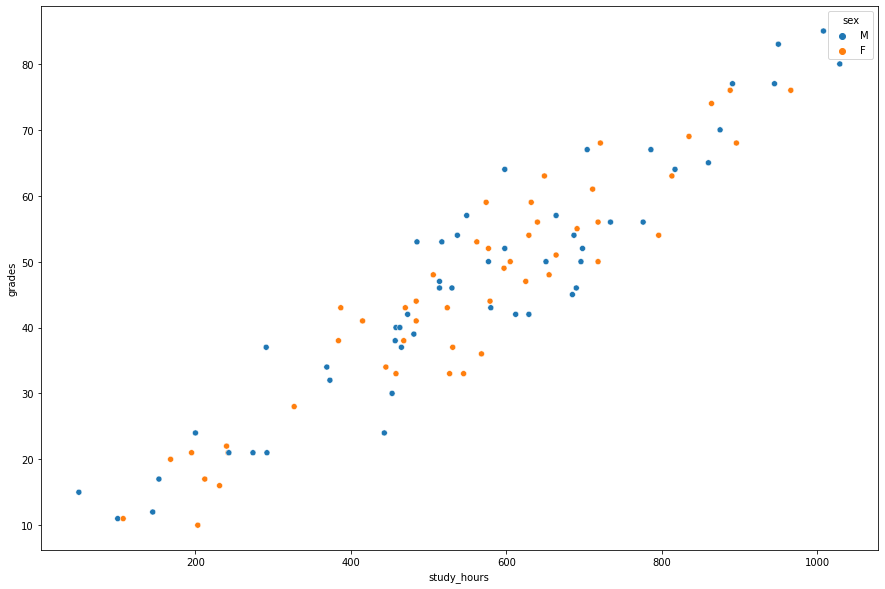

In [91]:
sns.scatterplot(x='study_hours', y='grades', data=data, hue='sex');

## Extensions to the linear model

There are several assumptions that are used when fitting a linear model. 
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* **Additive assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.
* **Linear assumption** The change in response for a one unit increase in $X_j$ is the same no matter what the value of $X_j$


### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we might think that the more our ads are listened in the radio, the more effective our TV ads are. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

[This is a commonly studied topic in marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

In [93]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          6.68e-146
Time:                        12:33:05   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remember the **Hierarchical principle:**

"*If we include an interaction in a model, we should also include the main effects, even if the p-values assiciated with their coefficients are not significant*"

**Exercise** [FAKE!]

Imagine there is a theory that states that partying out has more negative effect on females compared to males in terms of grades in the exams. That is, that there is a (negative) *synergetic* effect between both variables. Use the (mock) data to refute of validate this hypothesis.



In [94]:
# interaction model
results = smf.ols('grades ~ study_hours + party_hours + is_female + party_hours * is_female', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     358.8
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           2.11e-56
Time:                        12:39:46   Log-Likelihood:                -290.04
No. Observations:                 100   AIC:                             590.1
Df Residuals:                      95   BIC:                             603.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.4054      1.938      7.431      0.000      10.557      18.254
study_hours               0.0754      0.002     36.713      0.000       0.071       0.079
party_hours              -0.0198      0.003     -6.596      0.000      -0.026      -0.014
is_female                 0.8459      2.496      0.339      0.735      -4.109       5.801
party_hours:is_female    -0.0017      0.005     -0.376      0.708      -0.011       0.007
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.061
Skew:                          -0.061   Prob(JB):                        0.970
Kurtosis:                       2.990   Cond. No.                     5.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model selection

### Adjusted $R^2$

There is a funny thing with $R^2$. Look at what happens when we include *Random* variables!!

In [96]:
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [97]:
df_adv['rand_1'] = np.random.normal(size=200)
df_adv['rand_2'] = np.random.normal(size=200)
df_adv['rand_3'] = np.random.normal(size=200)
df_adv['rand_4'] = np.random.normal(size=200)
df_adv['rand_5'] = np.random.normal(size=200)
df_adv['rand_6'] = np.random.normal(size=200)
df_adv['rand_7'] = np.random.normal(size=200)
df_adv['rand_8'] = np.random.normal(size=200)

In [98]:
df_adv.head()

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
0,230.1,37.8,69.2,22.1,-0.358129,-0.093084,1.513687,1.643982,0.823534,-1.497029,0.073473,0.257048
1,44.5,39.3,45.1,10.4,-0.661927,0.520002,-1.554452,-0.540748,-0.042388,-0.422524,0.641547,2.172985
2,17.2,45.9,69.3,9.3,0.822464,2.383537,-0.711391,1.129785,-1.726701,-0.354627,-0.083639,-0.410373
3,151.5,41.3,58.5,18.5,0.242548,-0.331040,-0.113865,-0.598619,-1.104630,0.129038,-0.102043,-0.597775
4,180.8,10.8,58.4,12.9,0.739698,-1.647338,0.385712,-1.167796,0.041876,-0.613945,-0.910786,0.846387


In [100]:
results = smf.ols('Sales ~ TV + Radio + TV * Radio + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8', 
                  data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     536.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          1.56e-135
Time:                        12:43:13   Log-Likelihood:                -265.94
No. Observations:                 200   AIC:                             555.9
Df Residuals:                     188   BIC:                             595.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7494      0.254     26.562      0.000       6.248       7.251
TV             0.0191      0.002     12.345      0.000       0.016       0.022
Radio          0.0287      0.009      3.167      0.002       0.011       0.047
TV:Radio       0.0011   5.37e-05     20.239      0.000       0.001       0.001
rand_1         0.0894      0.070      1.268      0.206      -0.050       0.228
rand_2        -0.0588      0.060     -0.973      0.332      -0.178       0.060
rand_3         0.1021      0.064      1.599      0.112      -0.024       0.228
rand_4        -0.0085      0.068     -0.126      0.900      -0.142       0.125
rand_5         0.0737      0.067      1.098      0.274      -0.059       0.206
rand_6         0.0667      0.076      0.879      0.380      -0.083       0.216
rand_7         0.0484      0.062      0.786      0.433      -0.073       0.170
rand_8        -0.0111      0.071     -0.156      0.876      -0.151       0.129
==============================================================================
Omnibus:                      126.125   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.682
Skew:                          -2.264   Prob(JB):                    7.60e-259
Kurtosis:                      14.052   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The `Adj. R-squared` coefficient is meant to penalize the $R^2$ of a model when including *too many* varaibles. 
$$\bar R^2 = 1-(1-R^2){n-1 \over n-p-1}$$

There are other statistics to reflect the quality of a model auch as `AIC` ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)) and the `BIC` ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)) --- did you notice these names in the results from statsmodels?

When little number of features, Adjusted R2 is same as R2

### Stepwise selection

One should always aim to have a model as simple as possible! We will see other ways of doing this using **regularization**, but so far the methods we describe here are rather useful!

#### Best subset selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all ${p \choose k}$ models that contain exactly one predictor
    * choose the *best* among these ${p \choose k}$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

#### Forward stepwise selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all $p-k$ models that augment the predictors in $\mathcal{M_k}$  with one additional predictor.
    * choose the *best* among these $p-k$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

First:  
1. All models with only one variable. One wins. Winner A
2. Add to this model all variables, one by one. One wins. Winner B 
3. Add to this model all variables, one by one. One wins. Winner C
...
...

END: take the winner among A, B, C, D...

If R2 has two decimals same, we consider the model with more representative variables.

## Potential problems in Linear Regression

The main assumptions of a linear model are:

* Data is linear 
* Errors are not correlated
* Variance of error terms is constant

What if these assumptions are not met?? 

Additionally, our models may suffer from other issues such as:
* Outliers
* High Leverage points
* Collinearity
* Missing values

Watch this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.
Read section 3.3.3 of the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf).

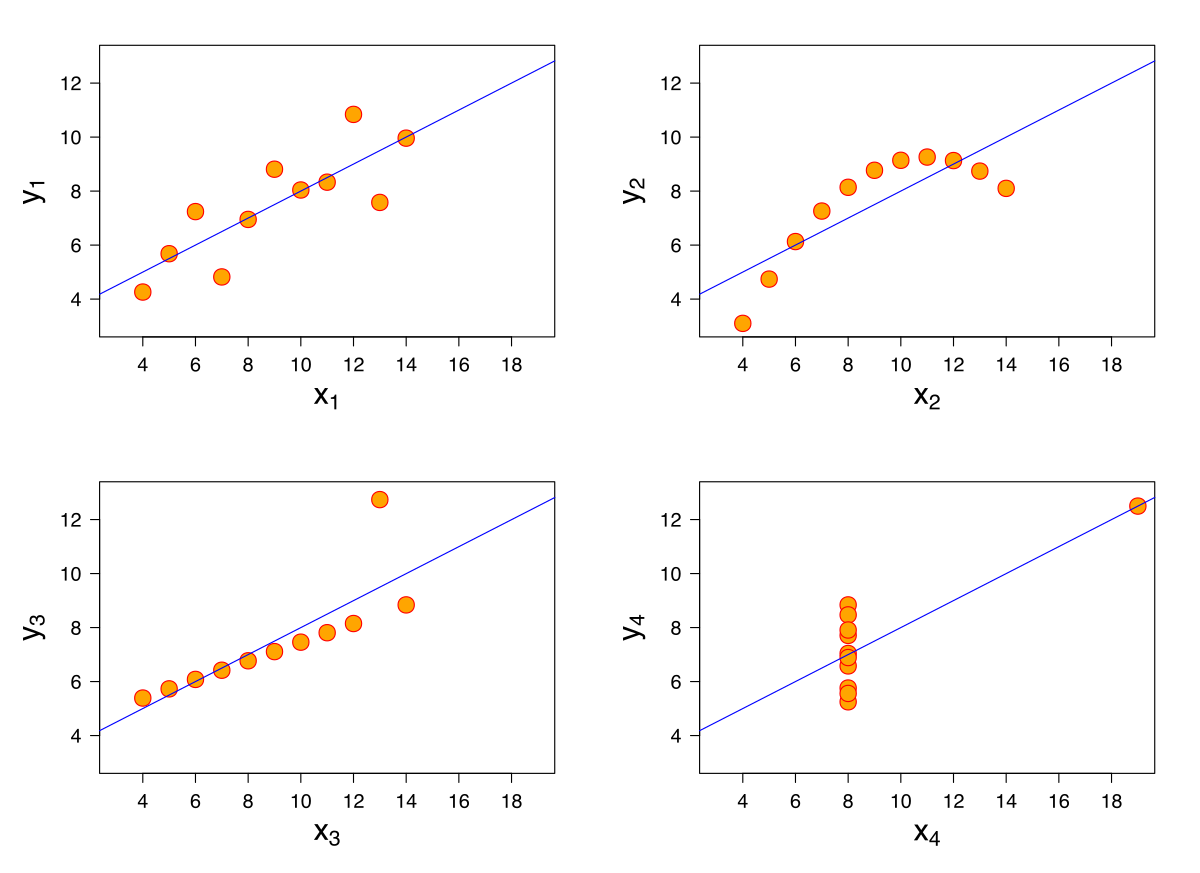

See [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)